In [1]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    #convert degrees to radians
    lon1 = radians(lon1)
    lat1 = radians(lat1)
    lon2 = radians(lon2)
    lat2 = radians(lat2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    distance = 2 * asin(sqrt(a)) * 6371 #6371 is the radius of the Earth
    return distance

In [2]:
from requests import get
import json
from pprint import pprint


In [3]:
stations = 'https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getallstations'
weather = 'https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getlatestmeasurements/'

In [4]:
my_lat = float(input('please, introduce your latitude')) #43.33
my_lon = float(input('please, introduce your longitude')) #-1.79

all_stations = get(stations).json()['items']

please, introduce your latitude43.33
please, introduce your longitude-1.79


In [5]:
def find_closest():
    smallest = 20036
    for station in all_stations:
        station_lon = station['weather_stn_long']
        station_lat = station['weather_stn_lat']
        
        distance = haversine(my_lon, my_lat, station_lon, station_lat)
        
        if distance < smallest:
            smallest = distance
            closest_station = station['weather_stn_id']
    return closest_station

In [6]:
find_closest()

1764846

In [7]:
closest_stn = find_closest()

In [8]:
weather = weather + str(closest_stn)

In [10]:
my_weather = get(weather).json()['items']
pprint(my_weather)

[{'air_pressure': 1012.77,
  'air_quality': 52.3,
  'ambient_temp': 27.09,
  'created_by': 'DGB',
  'created_on': '2019-10-03T23:35:01Z',
  'ground_temp': 22.75,
  'humidity': 39.43,
  'id': 19380382,
  'rainfall': 0,
  'reading_timestamp': '2019-10-03T23:35:01Z',
  'updated_by': 'DGB',
  'updated_on': '2019-10-05T02:33:25.573Z',
  'weather_stn_id': 1764846,
  'wind_direction': 315,
  'wind_gust_speed': 0,
  'wind_speed': 0}]


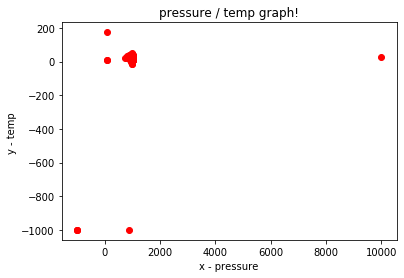

In [32]:
#Creamos un gráfico que devuelve la relacion entre temperatura y presión
# importing the required module
import matplotlib.pyplot as plt

stations = 'https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getallstations'

stations_weather = []

for station in all_stations:
    stations_weather.append ('https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getlatestmeasurements/'+str(station['weather_stn_id']))

#stations_weather = ['https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getlatestmeasurements/255541',
#'https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getlatestmeasurements/296861',
#'https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getlatestmeasurements/316321',
#'https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getlatestmeasurements/490722',
#'https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getlatestmeasurements/19760350',
#'https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getlatestmeasurements/505047',
#'https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getlatestmeasurements/508259',
#'https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getlatestmeasurements/586921',
#'https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getlatestmeasurements/17650487']



x = []
y = []

for station in stations_weather:
    
    station_data = get(station).json()['items']
    
    for sd in station_data:
        #print (sd['ambient_temp'])
        y.append (sd.get('ambient_temp'))
        x.append (sd.get('air_pressure'))

  
    
# plotting the points 
plt.plot(x, y,'ro')
       
        
# naming the x axis
plt.xlabel('x - pressure')
# naming the y axis
plt.ylabel('y - temp ')
  
# giving a title to my graph
plt.title('pressure / temp graph!')
  
# function to show the plot
plt.show()

In [23]:
stations = 'https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getallstations'

all_stations = get(stations).json()['items']

In [33]:
for station in all_stations:
    print ('https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getlatestmeasurements/'+str(station['weather_stn_id']))

https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getlatestmeasurements/255541
https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getlatestmeasurements/296861
https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getlatestmeasurements/316321
https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getlatestmeasurements/490722
https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getlatestmeasurements/497527
https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getlatestmeasurements/497974
https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getlatestmeasurements/504487
https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getlatestmeasurements/505047
https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getlatestmeasurements/505307
https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getlatestmeasurements/505367
https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getlatestmeasurements/506882
https://apex.oracle.c